# 15a: Risk-Return Scatter Plot

**Goal**: Create a publication-quality visualization of the E[V] vs σ(V) relationship.

**Key Finding**: Negative correlation (r = -0.38) — good hands have LOWER risk.

This is the headline finding: Texas 42 exhibits an inverse risk-return relationship, contrary to typical financial markets.

In [1]:
# === CONFIGURATION ===
PROJECT_ROOT = "/home/jason/v2/mk5-tailwind"

# === Setup imports ===
import sys
if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from scipy import stats
from pathlib import Path

from forge.analysis.utils import viz

# Publication-quality settings
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['figure.dpi'] = 150

print("Ready")

Ready


## 1. Load Data

In [2]:
# Load unified features
data_path = Path(PROJECT_ROOT) / "forge/analysis/results/tables/12b_unified_features.csv"
df = pd.read_csv(data_path)

E_V = df['V_mean'].values
sigma_V = df['V_std'].values
n_doubles = df['n_doubles'].values

print(f"Loaded {len(df)} hands")
print(f"E[V] range: [{E_V.min():.1f}, {E_V.max():.1f}]")
print(f"σ(V) range: [{sigma_V.min():.1f}, {sigma_V.max():.1f}]")

Loaded 200 hands
E[V] range: [-29.3, 42.0]
σ(V) range: [0.0, 37.7]


## 2. Compute Correlation Statistics

In [3]:
# Compute correlation with confidence interval
result = stats.pearsonr(E_V, sigma_V)
r = result.statistic
p = result.pvalue
ci = result.confidence_interval(confidence_level=0.95)

print(f"Pearson r = {r:.3f}")
print(f"95% CI: [{ci.low:.3f}, {ci.high:.3f}]")
print(f"p-value = {p:.2e}")

Pearson r = -0.381
95% CI: [-0.494, -0.256]
p-value = 2.64e-08


## 3. Publication-Quality Scatter Plot

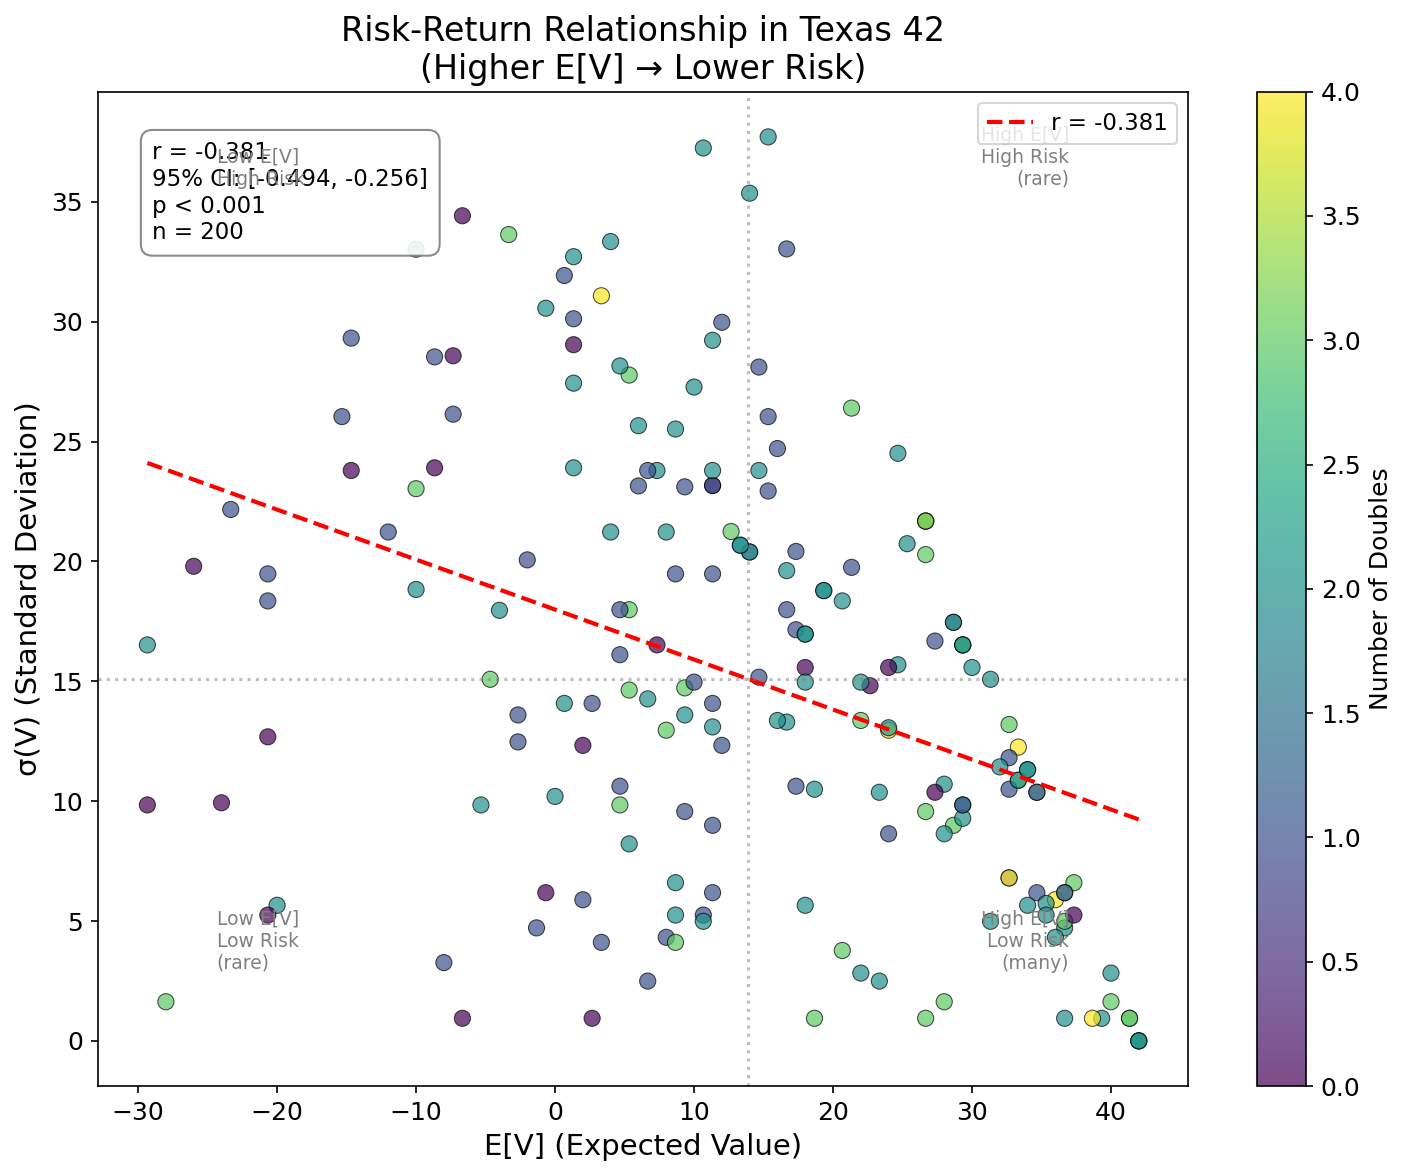


Saved to results/figures/15a_risk_return_scatter.png
Saved to results/figures/15a_risk_return_scatter.pdf


In [4]:
# Create figure
fig, ax = plt.subplots(figsize=(10, 8))

# Color points by n_doubles (the key predictor)
scatter = ax.scatter(
    E_V, sigma_V,
    c=n_doubles,
    cmap='viridis',
    s=60,
    alpha=0.7,
    edgecolors='black',
    linewidths=0.5
)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Number of Doubles', fontsize=12)

# Add regression line
slope, intercept, _, _, _ = stats.linregress(E_V, sigma_V)
x_line = np.linspace(E_V.min(), E_V.max(), 100)
y_line = slope * x_line + intercept
ax.plot(x_line, y_line, 'r--', linewidth=2, label=f'r = {r:.3f}')

# Labels and title
ax.set_xlabel('E[V] (Expected Value)', fontsize=14)
ax.set_ylabel('σ(V) (Standard Deviation)', fontsize=14)
ax.set_title('Risk-Return Relationship in Texas 42\n(Higher E[V] → Lower Risk)', fontsize=16)

# Add statistics annotation box
textstr = f'r = {r:.3f}\n95% CI: [{ci.low:.3f}, {ci.high:.3f}]\np < 0.001\nn = {len(E_V)}'
props = dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.9, edgecolor='gray')
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)

# Add quadrant labels
ax.axhline(y=sigma_V.mean(), color='gray', linestyle=':', alpha=0.5)
ax.axvline(x=E_V.mean(), color='gray', linestyle=':', alpha=0.5)

# Quadrant annotations
ax.text(E_V.max()-5, sigma_V.max()-2, 'High E[V]\nHigh Risk\n(rare)', fontsize=9, ha='right', color='gray')
ax.text(E_V.min()+5, sigma_V.max()-2, 'Low E[V]\nHigh Risk', fontsize=9, ha='left', color='gray')
ax.text(E_V.max()-5, 3, 'High E[V]\nLow Risk\n(many)', fontsize=9, ha='right', color='gray')
ax.text(E_V.min()+5, 3, 'Low E[V]\nLow Risk\n(rare)', fontsize=9, ha='left', color='gray')

ax.legend(loc='upper right', fontsize=11)

plt.tight_layout()
plt.savefig('../../results/figures/15a_risk_return_scatter.png', dpi=300, bbox_inches='tight')
plt.savefig('../../results/figures/15a_risk_return_scatter.pdf', bbox_inches='tight')  # Vector format
plt.show()

print("\nSaved to results/figures/15a_risk_return_scatter.png")
print("Saved to results/figures/15a_risk_return_scatter.pdf")

## 4. Alternative: Simple Clean Version

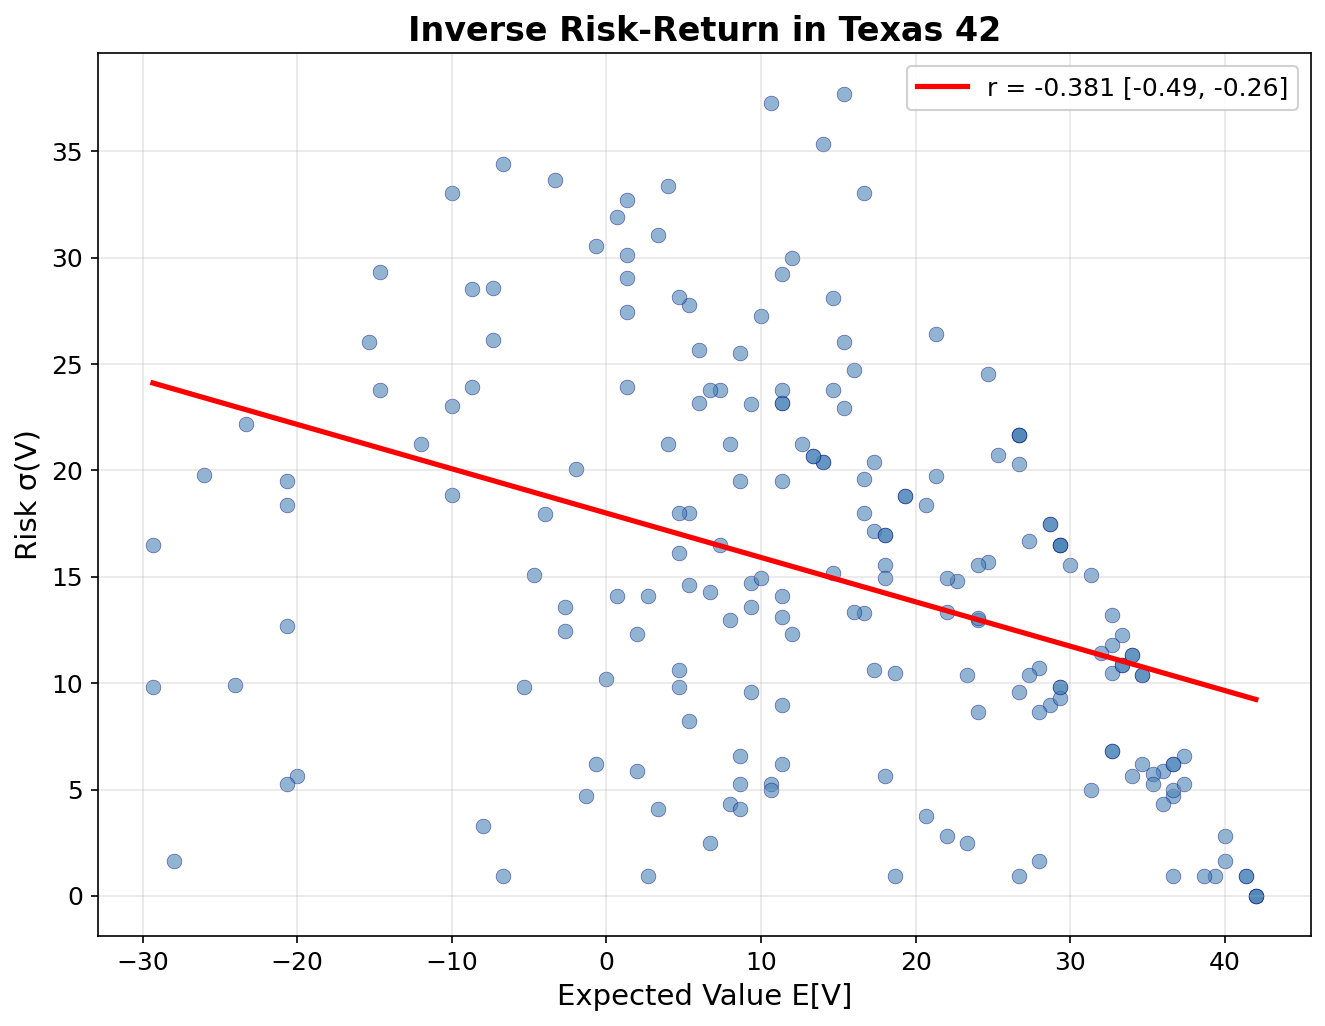


Saved clean version to results/figures/15a_risk_return_clean.png


In [5]:
# Cleaner version without quadrant annotations
fig, ax = plt.subplots(figsize=(9, 7))

ax.scatter(
    E_V, sigma_V,
    c='steelblue',
    s=50,
    alpha=0.6,
    edgecolors='navy',
    linewidths=0.3
)

# Regression line with confidence band
ax.plot(x_line, y_line, 'r-', linewidth=2.5, label=f'r = {r:.3f} [{ci.low:.2f}, {ci.high:.2f}]')

ax.set_xlabel('Expected Value E[V]', fontsize=14)
ax.set_ylabel('Risk σ(V)', fontsize=14)
ax.set_title('Inverse Risk-Return in Texas 42', fontsize=16, fontweight='bold')
ax.legend(loc='upper right', fontsize=12, framealpha=0.9)

# Grid
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../../results/figures/15a_risk_return_clean.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nSaved clean version to results/figures/15a_risk_return_clean.png")

## 5. Hexbin for Dense Regions (if we had more data)

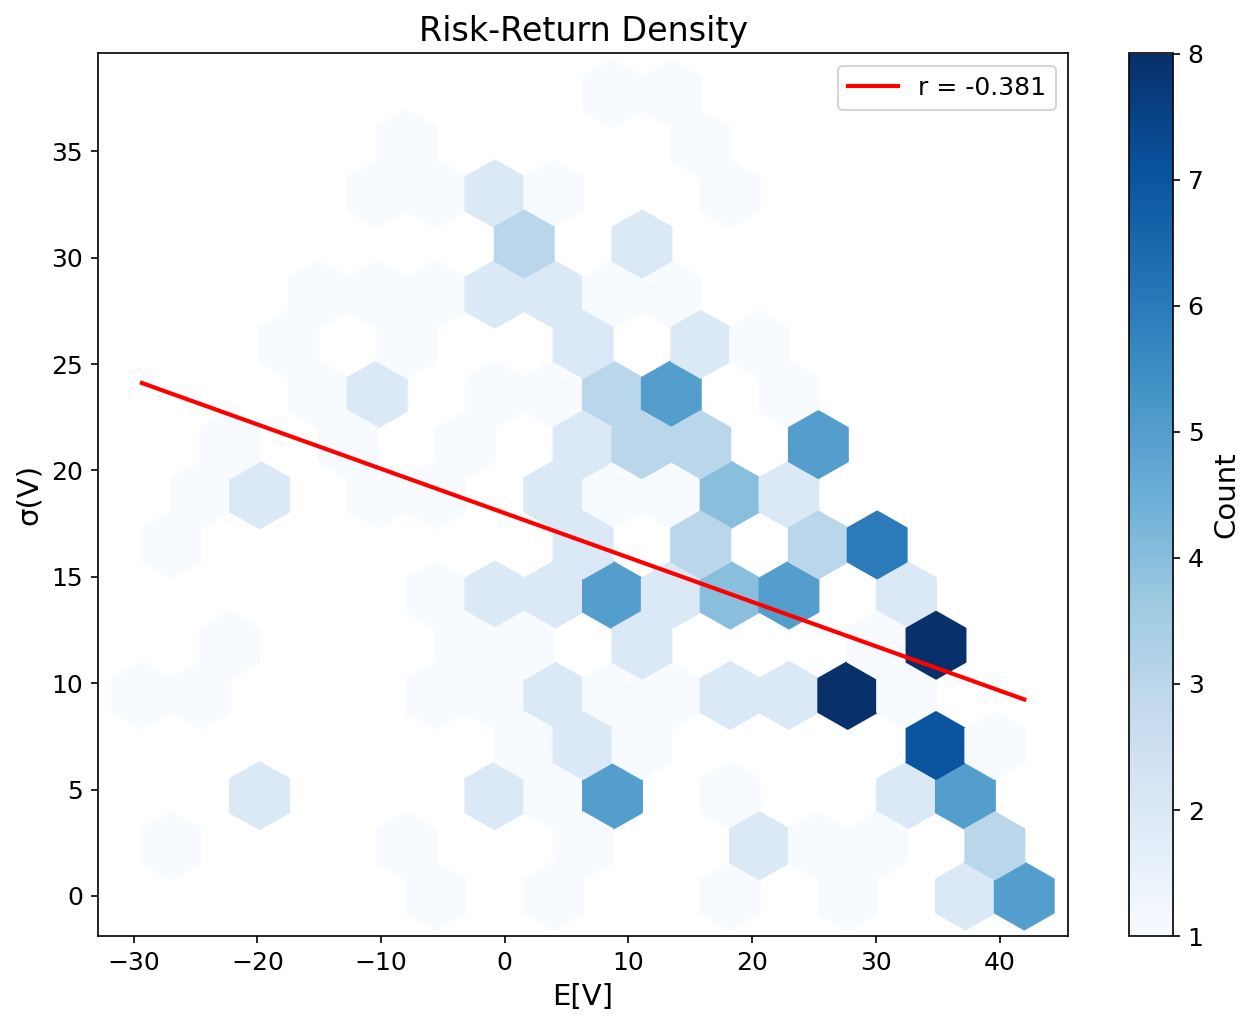

In [6]:
# For larger datasets, hexbin can show density
fig, ax = plt.subplots(figsize=(9, 7))

hb = ax.hexbin(
    E_V, sigma_V,
    gridsize=15,
    cmap='Blues',
    mincnt=1
)

ax.plot(x_line, y_line, 'r-', linewidth=2, label=f'r = {r:.3f}')

cb = plt.colorbar(hb, ax=ax)
cb.set_label('Count')

ax.set_xlabel('E[V]', fontsize=14)
ax.set_ylabel('σ(V)', fontsize=14)
ax.set_title('Risk-Return Density', fontsize=16)
ax.legend(loc='upper right')

plt.tight_layout()
plt.savefig('../../results/figures/15a_risk_return_hexbin.png', dpi=150, bbox_inches='tight')
plt.show()

## Key Finding

### The Inverse Risk-Return Relationship

**Correlation**: r = -0.38 (95% CI: [-0.49, -0.26])

**Interpretation**: In Texas 42:
- **Good hands have LOWER risk** (not higher)
- Hands with high expected value also have low variance
- This is the opposite of typical financial markets

**Why?** Good hands (many doubles, strong trumps) provide control:
- You can win tricks regardless of opponent holdings
- Less dependence on luck of the draw
- More predictable outcomes

Bad hands leave outcomes to chance:
- Dependent on opponent hands
- High variance in possible outcomes

### Visual Message

The scatter plot shows:
1. **Negative slope**: Clear downward trend
2. **Doubles matter**: Points colored by n_doubles show higher doubles → upper left (high E[V], low risk)
3. **No high-E[V] high-risk hands**: Upper right is empty